In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
os.environ["PUIDATA"] = "{}/PUIdata".format(os.getenv("HOME"))
puidata = os.environ["PUIDATA"]

In [3]:
!curl -O https://s3.amazonaws.com/tripdata/201711-citibike-tripdata.csv.zip

!unzip 201711-citibike-tripdata.csv.zip -d $PUIDATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45.5M  100 45.5M    0     0  71.9M      0 --:--:-- --:--:-- --:--:-- 71.9M
Archive:  201711-citibike-tripdata.csv.zip
  inflating: /nfshome/cb4102/PUIdata/201711-citibike-tripdata.csv  


In [2]:
citibike = pd.read_csv(os.getenv("PUIDATA") + "/" + "201711-citibike-tripdata.csv")

In [7]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,297,2017-11-01 00:00:01,2017-11-01 00:04:59,418,Front St & Gold St,40.702240,-73.982578,414,Pearl St & Anchorage Pl,40.702819,-73.987658,24753,Subscriber,1986.0,1
1,269,2017-11-01 00:00:01,2017-11-01 00:04:30,3556,24 St & 41 Ave,40.752709,-73.939740,3126,44 Dr & Jackson Ave,40.747182,-73.943264,19063,Subscriber,1990.0,1
2,285,2017-11-01 00:00:04,2017-11-01 00:04:50,275,Washington Ave & Greene Ave,40.686501,-73.965633,3429,Hanson Pl & Ashland Pl,40.685068,-73.977908,29131,Subscriber,1993.0,1
3,478,2017-11-01 00:00:13,2017-11-01 00:08:11,3545,Broadway & W 122 St,40.812056,-73.961255,3316,W 104 St & Amsterdam Ave,40.798994,-73.966217,32841,Customer,NaN,0
4,574,2017-11-01 00:00:20,2017-11-01 00:09:54,458,11 Ave & W 27 St,40.751396,-74.005226,434,9 Ave & W 18 St,40.743174,-74.003664,17697,Subscriber,1975.0,2


In [3]:
citibike['date'] = pd.to_datetime(citibike["starttime"])

In [4]:
citibike['hour'] = pd.DatetimeIndex(citibike['starttime']).hour

In [10]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour
0,297,2017-11-01 00:00:01,2017-11-01 00:04:59,418,Front St & Gold St,40.702240,-73.982578,414,Pearl St & Anchorage Pl,40.702819,-73.987658,24753,Subscriber,1986.0,1,2017-11-01 00:00:01,0
1,269,2017-11-01 00:00:01,2017-11-01 00:04:30,3556,24 St & 41 Ave,40.752709,-73.939740,3126,44 Dr & Jackson Ave,40.747182,-73.943264,19063,Subscriber,1990.0,1,2017-11-01 00:00:01,0
2,285,2017-11-01 00:00:04,2017-11-01 00:04:50,275,Washington Ave & Greene Ave,40.686501,-73.965633,3429,Hanson Pl & Ashland Pl,40.685068,-73.977908,29131,Subscriber,1993.0,1,2017-11-01 00:00:04,0
3,478,2017-11-01 00:00:13,2017-11-01 00:08:11,3545,Broadway & W 122 St,40.812056,-73.961255,3316,W 104 St & Amsterdam Ave,40.798994,-73.966217,32841,Customer,NaN,0,2017-11-01 00:00:13,0
4,574,2017-11-01 00:00:20,2017-11-01 00:09:54,458,11 Ave & W 27 St,40.751396,-74.005226,434,9 Ave & W 18 St,40.743174,-74.003664,17697,Subscriber,1975.0,2,2017-11-01 00:00:20,0


In [5]:
#make a dataframe to look at the distribution by hour

citibike_hr_cnt = citibike.groupby(citibike['hour']).count() #check to see the distribution of rides by hour

In [6]:
#reset the index so hour is a column
citibike_hr_cnt.reset_index(inplace=True)


In [18]:
citibike_hr_cnt.head()

,hour,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,0,10508,10508,10508,10508,10508,10508,10508,10508,10508,10508,10508,10508,10508,9892,10508,10508
1,1,5824,5824,5824,5824,5824,5824,5824,5824,5824,5824,5824,5824,5824,5453,5824,5824
2,2,3067,3067,3067,3067,3067,3067,3067,3067,3067,3067,3067,3067,3067,2873,3067,3067
3,3,1964,1964,1964,1964,1964,1964,1964,1964,1964,1964,1964,1964,1964,1831,1964,1964
4,4,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112,2112,2015,2112,2112


In [21]:
citibike_hr_cnt['percent'] = (citibike_hr_cnt['bikeid'] / citibike_hr_cnt['bikeid'].sum()) * 100 #make a column with percentages

In [24]:
citibike_hr_cnt['percent'].sum() #check they sum to 100

100.0

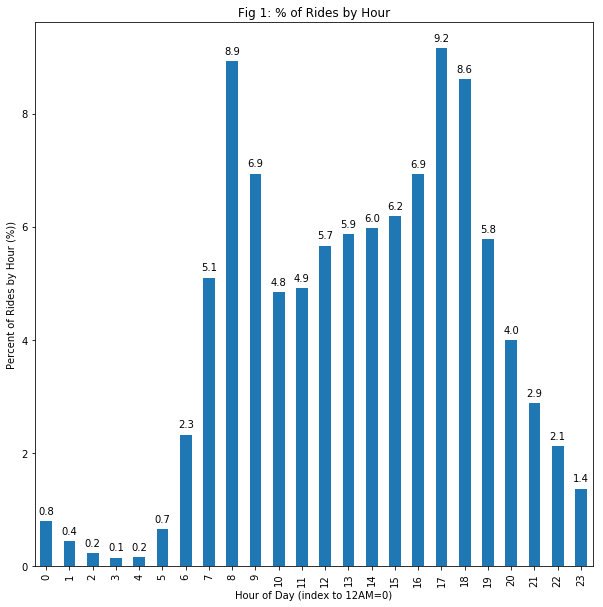

In [32]:
##plot the distribution by hour
fig = plt.figure(figsize=(10,10)) #initialize figure
ax1 = fig.add_subplot(111) #initialize subplot

citibike_hr_cnt.plot(x='hour', y='percent', kind='bar', ax=ax1,legend=False)

ax1.set_xlabel("Hour of Day (index to 12AM=0)") #x label added
ax1.set_ylabel("Percent of Rides by Hour (%))") #add Y label
ax1.grid(False)

rects = ax1.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                 

plt.title("Fig 1: % of Rides by Hour")
plt.savefig('Fig 1: % of Rides by Hour.png')

In [29]:
def night_day_label(row):
    """Function to set up a column based on conditions"""
    if row['hour'] < 5:
        return 1
    if row['hour'] >= 20:
        return 1
    else:
        return 0

In [30]:
citibike['night_flag'] = citibike.apply(lambda row: night_day_label(row),axis=1) #apply night_day_label

In [31]:
citibike_clean = citibike[['hour','gender','night_flag']] #filter and create new dataframe
citibike_clean.head() #print new df head

,hour,gender,night_flag
0,0,1,1
1,0,1,1
2,0,1,1
3,0,0,1
4,0,2,1


In [37]:
#plot data I think we be relevant:

men_biking = citibike_clean[citibike_clean['gender'] == 1]
women_biking = citibike_clean[citibike_clean['gender'] == 2]
men_biking_night = citibike_clean[(citibike_clean['gender'] == 1) & (citibike_clean['night_flag'] ==1)]
women_biking_night = citibike_clean[(citibike['gender'] == 2) & (citibike_clean['night_flag'] ==1)]
men_biking_day = citibike_clean[(citibike_clean['gender'] == 1) & (citibike_clean['night_flag'] == 0)]
women_biking_day = citibike_clean[(citibike['gender'] == 2) & (citibike_clean['night_flag'] ==0)]

In [41]:
men_biking_night.head()

,hour,gender,night_flag
0,0,1,1
1,0,1,1
2,0,1,1
5,0,1,1
7,0,1,1


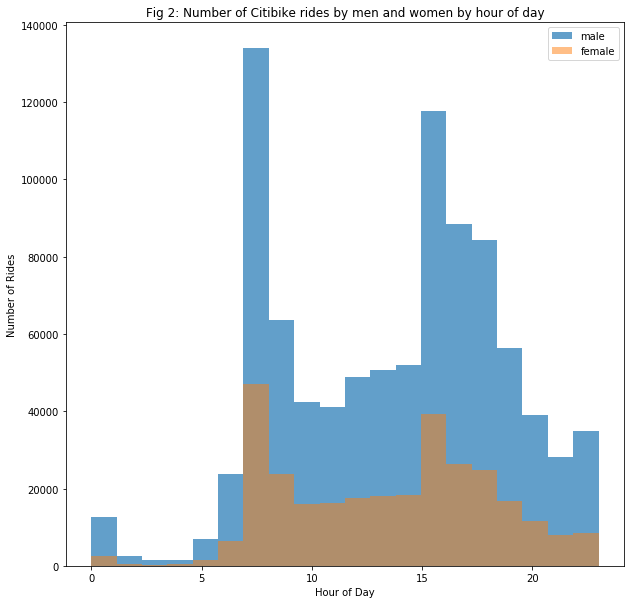

In [34]:

fig = plt.figure(figsize=(10,10)) #initialize figure
ax1 = fig.add_subplot(111) #initialize subplot

ax1.hist(men_biking['hour'], bins=20, alpha=0.7, label="male")
ax1.hist(women_biking['hour'], bins=20, alpha=0.5, label="female")

plt.xlabel("Hour of Day") #x label added
plt.ylabel("Number of Rides") #add Y label
plt.legend(loc = "upper right") #add legend
plt.title("Fig 2: Number of Citibike rides by men and women by hour of day")

plt.savefig('Fig 2: Number of Citibike Rides by Men and Women and Hour of the Day.png')

In [48]:
#import function to a chi-square test:

def chi_square(x, Ntot):
    """Function to calculate the chi-square value from a 2-dimensional array"""
    test_fel = (x[0,0] + x[0,1]) * (x[0,0] + x[1,0]) / Ntot 
    control_fel = (x[1,0] + x[1,1]) * (x[0,0] + x[1,0]) / Ntot
    test_no = (x[0,0] + x[0,1]) * (x[0,1] + x[1,1]) / Ntot
    control_no = (x[1,0] + x[1,1]) * (x[0,1] + x[1,1]) / Ntot
    
    a = ((x[0,0] - test_fel) ** 2) / test_fel
    b = ((x[1,0] - control_fel) ** 2) / control_fel
    c = ((x[0,1] - test_no) ** 2) / test_no
    d = ((x[1,1] - control_no) ** 2) / control_no
    
    chi_square = a + b + c + d
    
    return print("The chi-square value is:", chi_square)


In [54]:
citibike_clean['hour'].count()

1330649

In [53]:
#outputs the contingency matrix

citibike_clean.groupby(['night_flag','gender']).count()

hour
night_flag gender        
0          0        86443
           1       810377
           2       272486
1          0         9279
           1       120350
           2        31714

In [55]:
#chi_square(sample_values, Ntot)

Ntot =  1234927 

sample_values = np.array([[120350, 31714], [810377, 272486]])

chi_square(sample_values, Ntot)

The chi-square value is: 1332.80924157


In [56]:
120350/31714 #actual ratio of men-to-women at night time

3.794854007693763

In [57]:
810377/272486 #ratio of men to women during the day

2.9740133438048195

In [58]:
(31714+272486) / (120350+810377)

0.32684127569093835

In [59]:
31714/(31714+120350)

0.2085569234006734